# Проект "Вольный луг"

Необходимо разработать модель машинного обучения, которая поможет фермеру управлять рисками и принимать объективное решение о покупке. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а надой был вкусным — строго по его критериям. «ЭкоФерма» готова предоставить подробные данные о своих коровах.

Необходимо создать две прогнозные модели для отбора бурёнок в поголовье:
- Первая будет прогнозировать возможный удой у коровы (целевой признак Удой);
- Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).


## Загрузка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    r2_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix
)

In [ ]:
RANDOM_STATE = 42

In [ ]:
main = pd.read_csv('/datasets/ferma_main.csv',  sep=';', decimal=',')
main.head(10)

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет
5,6,5254,12.7,1806,0.885,РефлешнСоверинг,Холмистое,Соверин,3.13,3.078,вкусно,менее_2_лет
6,7,5910,13.2,1792,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.48,3.077,вкусно,более_2_лет
7,8,6179,14.7,1806,0.930,Вис Бик Айдиал,Равнинные,Айдиал,3.55,3.076,вкусно,более_2_лет
8,9,6783,14.2,1918,0.940,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.077,вкусно,более_2_лет
9,10,5339,13.4,1791,0.895,Вис Бик Айдиал,Холмистое,Соверин,3.13,3.075,вкусно,менее_2_лет


In [ ]:
main = main.rename(
    columns = {
        'Удой, кг':'milk_kg',
        'ЭКЕ (Энергетическая кормовая единица)':'eky',
        'Сырой протеин, г':'protein_g',
        'СПО (Сахаро-протеиновое соотношение)':'spo',
        'Порода':'cow_breed',
        'Тип пастбища':'pasture_type',
        'порода папы_быка':'dad_breed',
        'Жирность,%':'fat_share',
        'Белок,%':'protein_share',
        'Вкус молока':'taste',
        'Возраст':'age',
    }
)

In [ ]:
main.head(10)

,id,milk_kg,eky,protein_g,spo,cow_breed,pasture_type,dad_breed,fat_share,protein_share,taste,age
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет
5,6,5254,12.7,1806,0.885,РефлешнСоверинг,Холмистое,Соверин,3.13,3.078,вкусно,менее_2_лет
6,7,5910,13.2,1792,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.48,3.077,вкусно,более_2_лет
7,8,6179,14.7,1806,0.930,Вис Бик Айдиал,Равнинные,Айдиал,3.55,3.076,вкусно,более_2_лет
8,9,6783,14.2,1918,0.940,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.077,вкусно,более_2_лет
9,10,5339,13.4,1791,0.895,Вис Бик Айдиал,Холмистое,Соверин,3.13,3.075,вкусно,менее_2_лет


In [ ]:
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             634 non-null    int64  
 1   milk_kg        634 non-null    int64  
 2   eky            634 non-null    float64
 3   protein_g      634 non-null    int64  
 4   spo            634 non-null    float64
 5   cow_breed      634 non-null    object 
 6   pasture_type   634 non-null    object 
 7   dad_breed      634 non-null    object 
 8   fat_share      634 non-null    float64
 9   protein_share  634 non-null    float64
 10  taste          634 non-null    object 
 11  age            634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


Видно, что пропусков нет. Все колонки нужного типа данных. Проверим наличие дубликатов и удалим при необходимости.

In [ ]:
dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
dad.head(10)

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
5,6,Барин
6,7,Соловчик
7,8,Геркулес
8,9,Буйный
9,10,Барин


In [ ]:
dad = dad.rename(
    columns = {
        'Имя Папы':'dad_name',
    }
)

In [ ]:
dad.head(10)

,id,dad_name
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
5,6,Барин
6,7,Соловчик
7,8,Геркулес
8,9,Буйный
9,10,Барин


In [ ]:
dad.info

<bound method DataFrame.info of       id  dad_name
0      1    Буйный
1      2  Соловчик
2      3     Барин
3      4    Буйный
4      5     Барин
..   ...       ...
624  625    Буйный
625  626     Барин
626  627     Барин
627  628     Барин
628  629  Соловчик

[629 rows x 2 columns]>

Видно, что пропусков нет. Все колонки нужного типа данных. Проверим наличие дубликатов и удалим при необходимостb.

In [ ]:
cow = pd.read_csv('/datasets/cow_buy.csv', sep=';', decimal=',')
cow.head(10)

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


In [ ]:
cow = cow.rename(
    columns = {
        'Порода':'cow_breed',
        'Тип пастбища':'pasture_type',
        'порода папы_быка':'dad_breed',
        'Имя_папы':'dad_name',
        'Текущая_жирность,%':'fat_share',
        'Текущий_уровень_белок,%':'protein_share',
        'Возраст':'age',
    }
)

In [ ]:
cow.head(10)

,cow_breed,pasture_type,dad_breed,dad_name,fat_share,protein_share,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


In [ ]:
cow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cow_breed      20 non-null     object 
 1   pasture_type   20 non-null     object 
 2   dad_breed      20 non-null     object 
 3   dad_name       20 non-null     object 
 4   fat_share      20 non-null     float64
 5   protein_share  20 non-null     float64
 6   age            20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


Видно, что пропусков нет. Все колонки нужного типа данных. Проверим наличие дубликатов и удалим при необходимости.

##  Предобработка данных

In [ ]:
main.duplicated().sum()

5

In [ ]:
main = main.drop_duplicates().reset_index(drop = True)
main.duplicated().sum()

0

In [ ]:
main['pasture_type'] = main['pasture_type'].str.lower()

In [ ]:
main['cow_breed'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [ ]:
main['pasture_type'].unique()

array(['равнинное', 'равнинные', 'холмистое'], dtype=object)

In [ ]:
main['pasture_type'] = main['pasture_type'].replace('равнинные','равнинное')
main['pasture_type'].unique()

array(['равнинное', 'холмистое'], dtype=object)

In [ ]:
main['dad_breed'].unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

In [ ]:
main['dad_breed'] = main['dad_breed'].replace('Айдиалл','Айдиал')
main['dad_breed'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [ ]:
dad.duplicated().sum()

0

In [ ]:
dad['dad_name'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

In [ ]:
cow.duplicated().sum()

4

In [ ]:
cow['cow_breed'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [ ]:
cow['pasture_type'].unique()

array(['холмистое', 'равнинное'], dtype=object)

In [ ]:
cow['dad_breed'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [ ]:
cow['dad_name'].unique()

array(['Геркулес', 'Буйный', 'Барин', 'Соловчик'], dtype=object)

Предположим, что в таблице cow на покупку указаны разные коровы. Удалять дубликаты пока не будем.

ВЫВОД:
- удалили дубликаты;
- привели тип пастбищ в датасетах main и cow к строчному написанию букв.

## Исследовательский анализ данных

ДАТАСЕТ MAIN

In [ ]:
main.head(10)

,id,milk_kg,eky,protein_g,spo,cow_breed,pasture_type,dad_breed,fat_share,protein_share,taste,age
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет
5,6,5254,12.7,1806,0.885,РефлешнСоверинг,холмистое,Соверин,3.13,3.078,вкусно,менее_2_лет
6,7,5910,13.2,1792,0.885,Вис Бик Айдиал,равнинное,Соверин,3.48,3.077,вкусно,более_2_лет
7,8,6179,14.7,1806,0.930,Вис Бик Айдиал,равнинное,Айдиал,3.55,3.076,вкусно,более_2_лет
8,9,6783,14.2,1918,0.940,РефлешнСоверинг,холмистое,Айдиал,3.71,3.077,вкусно,более_2_лет
9,10,5339,13.4,1791,0.895,Вис Бик Айдиал,холмистое,Соверин,3.13,3.075,вкусно,менее_2_лет


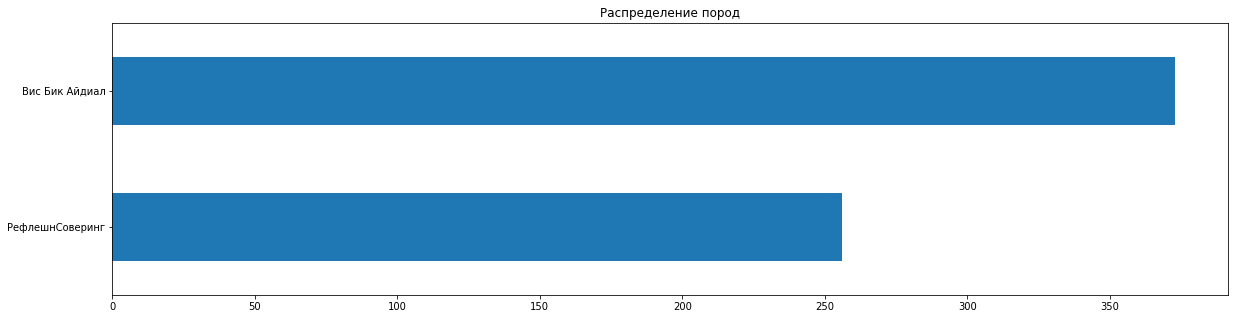

In [ ]:
main['cow_breed'].value_counts().sort_values().plot.barh(figsize=(20, 5))
plt.title('Распределение пород')
plt.show()

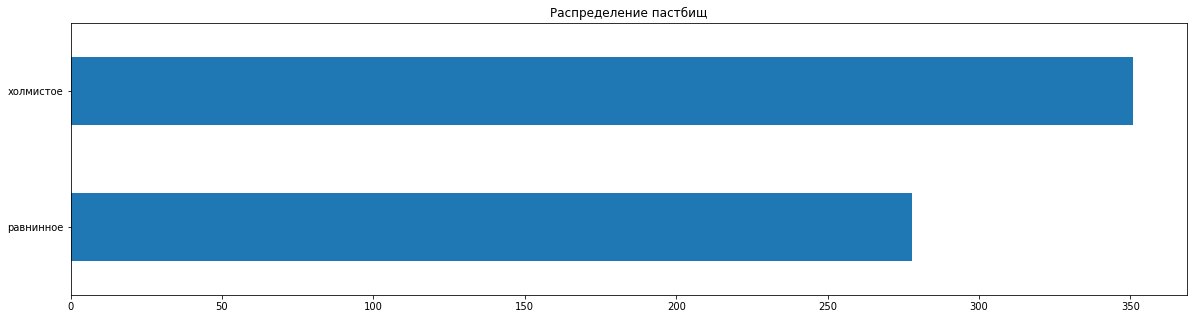

In [ ]:
main['pasture_type'].value_counts().sort_values().plot.barh(figsize=(20, 5))
plt.title('Распределение пастбищ')
plt.show()

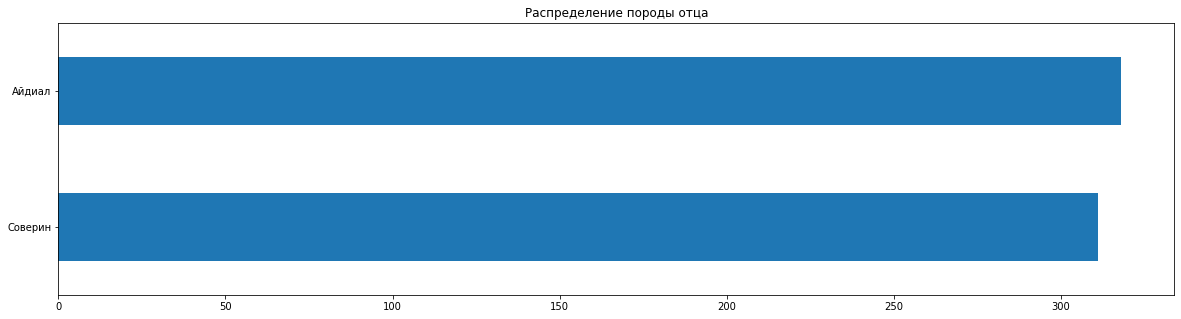

In [ ]:
main['dad_breed'].value_counts().sort_values().plot.barh(figsize=(20, 5))
plt.title('Распределение породы отца')
plt.show()

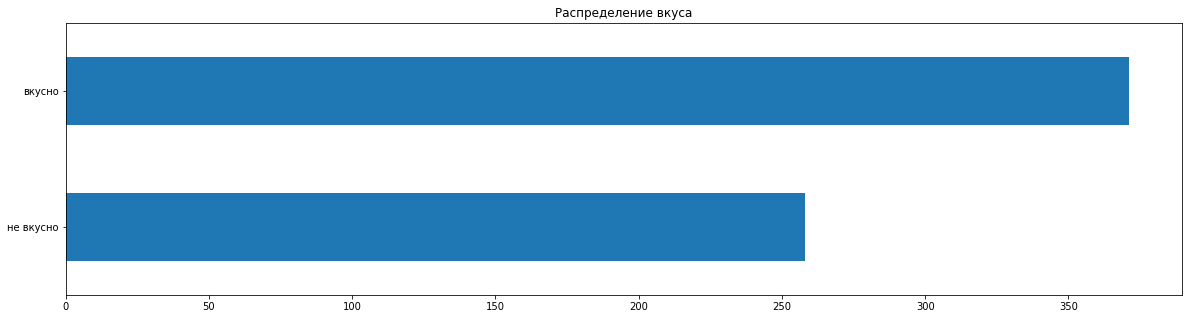

In [ ]:
main['taste'].value_counts().sort_values().plot.barh(figsize=(20, 5))
plt.title('Распределение вкуса')
plt.show()

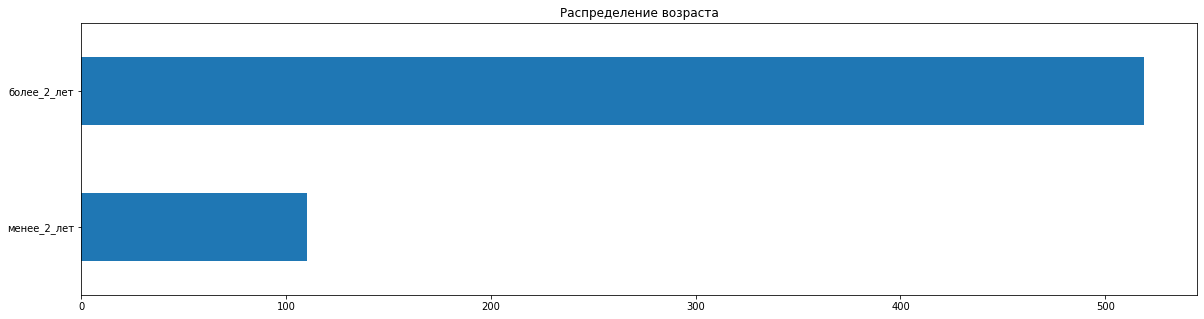

In [ ]:
main['age'].value_counts().sort_values().plot.barh(figsize=(20, 5))
plt.title('Распределение возраста')
plt.show()

In [ ]:
def plot_numeric(df, variable, title, xlabel, bins):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
    f.suptitle(title, fontsize=20)
    ax1.boxplot(df[variable])
    ax1.set_title('Ящик с усами')
    ax1.set_xlabel(xlabel)
    ax1.set_xticks([])

    ax2.hist(df[variable], bins=bins)
    ax2.set_title('Гистограмма')
    ax2.set_xlabel(xlabel)

    plt.show()


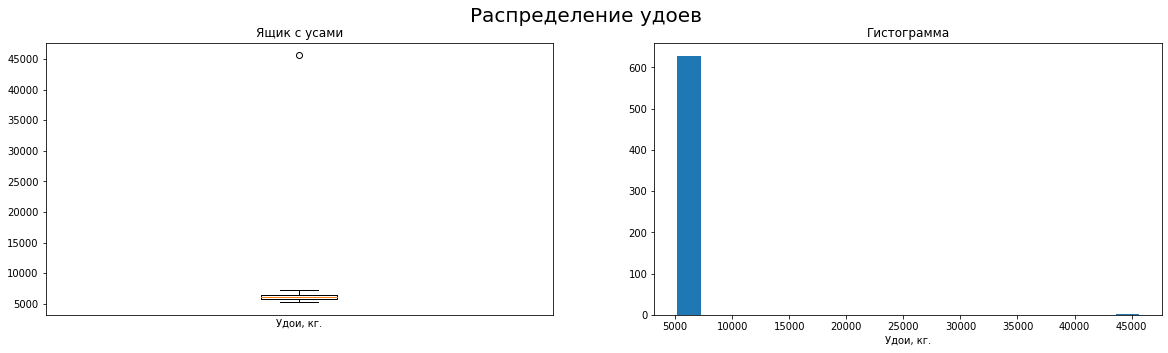

In [ ]:
plot_numeric(main, 'milk_kg', 'Распределение удоев', 'Удои, кг.', 20)

Можем заметить сильные выбросы, удалим.

In [ ]:
main = main[main['milk_kg'] <= 15000]

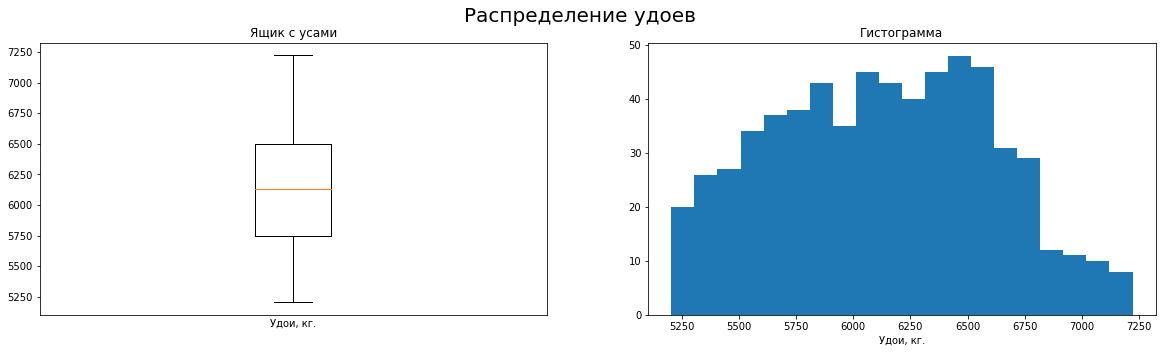

In [ ]:
plot_numeric(main, 'milk_kg', 'Распределение удоев', 'Удои, кг.', 20)

Аномальных выбросов не наблюдается.

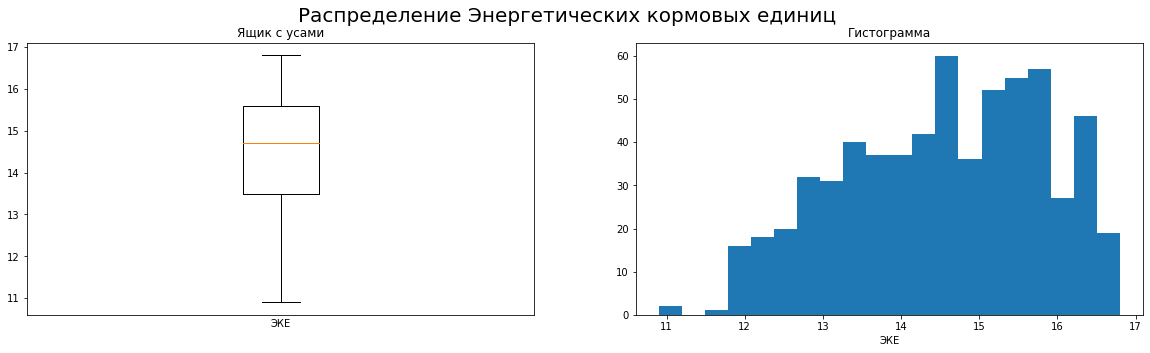

In [ ]:
plot_numeric(
    main, 'eky', 'Распределение Энергетических кормовых единиц', 'ЭКЕ', 20
)

Аномальных выбросов не наблюдается.

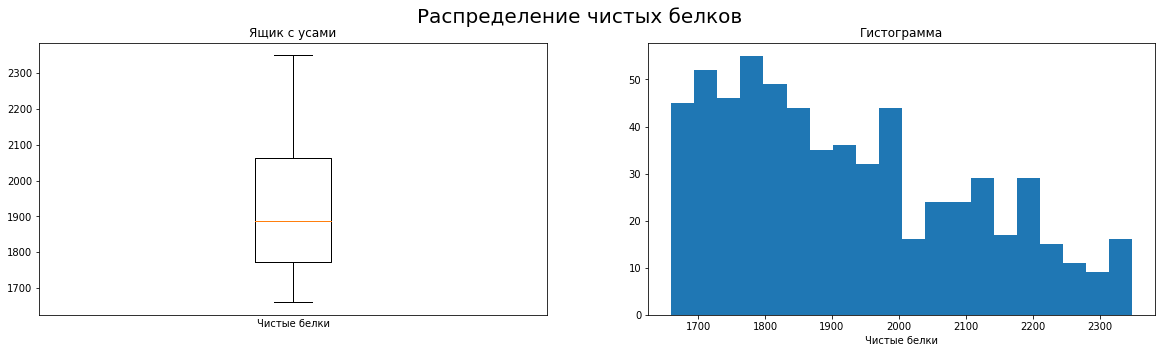

In [ ]:
plot_numeric(
    main, 'protein_g', 'Распределение чистых белков', 'Чистые белки', 20
)

Аномальных выбросов не наблюдается.

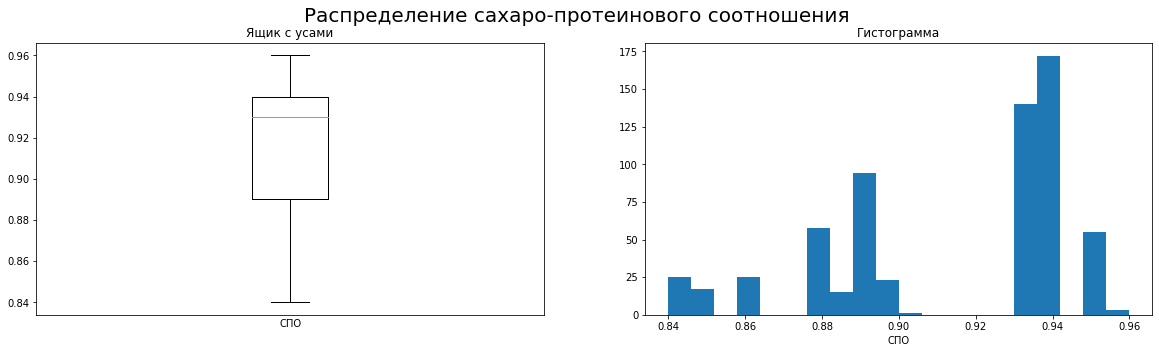

In [ ]:
plot_numeric(
    main, 'spo', 'Распределение сахаро-протеинового соотношения', 'СПО', 20
)

Аномальных выбросов не наблюдается.

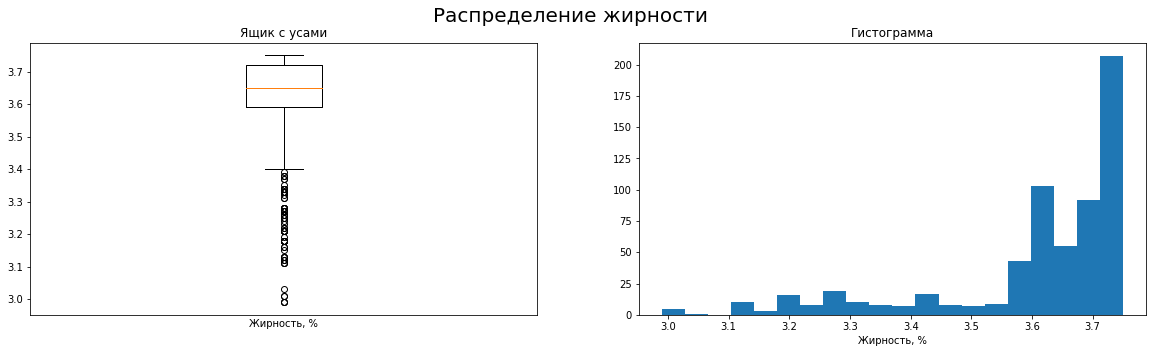

In [ ]:
plot_numeric(main, 'fat_share', 'Распределение жирности', 'Жирность, %', 20)

Боксплот показывает нам обилие статистических выбросов, но здравый смысл подсказывает, что в молоке 3% жирности нет ничего особенного.

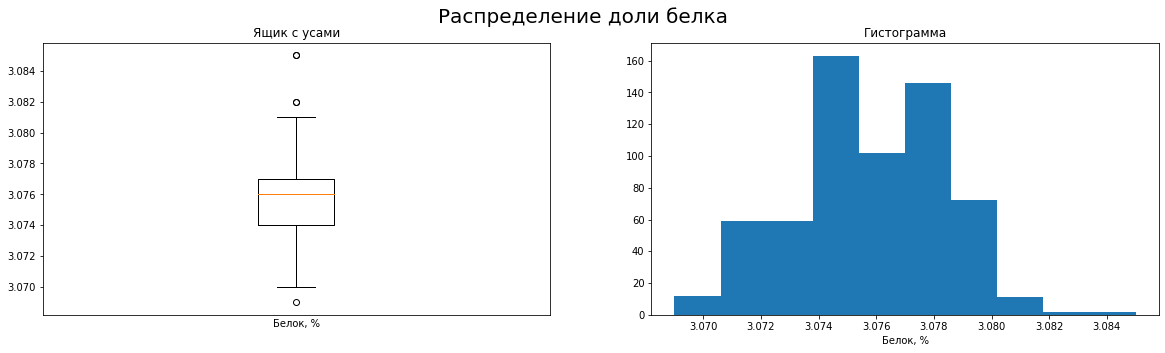

In [ ]:
plot_numeric(main, 'protein_share', 'Распределение доли белка', 'Белок, %', 10)

Удалим выбросы.

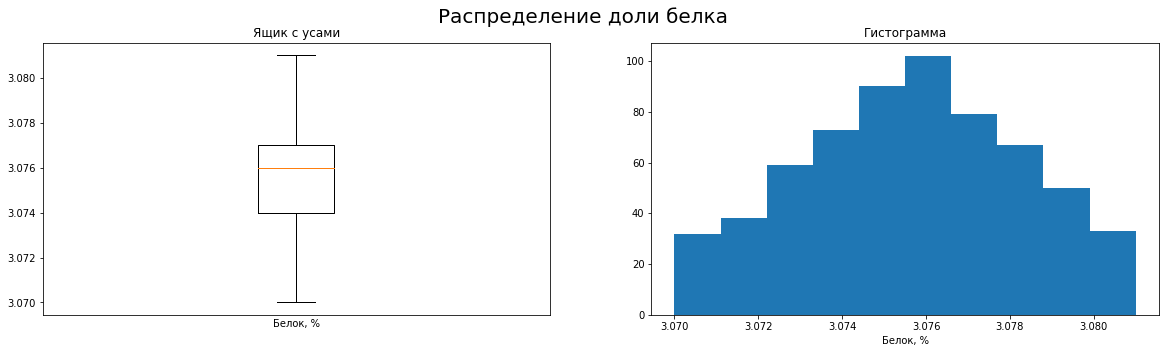

In [ ]:
main = main[(main['protein_share'] >= 3.07) & (main['protein_share'] <= 3.081)]
plot_numeric(main, 'protein_share', 'Распределение доли белка', 'Белок, %', 10)

ДАТАСЕТ DAD

In [ ]:
dad.head(10)

,id,dad_name
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
5,6,Барин
6,7,Соловчик
7,8,Геркулес
8,9,Буйный
9,10,Барин


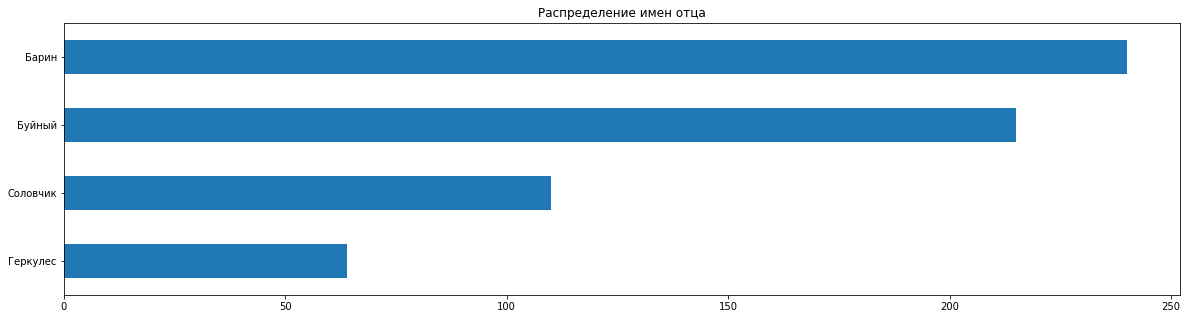

In [ ]:
dad['dad_name'].value_counts().sort_values().plot.barh(figsize=(20, 5))
plt.title('Распределение имен отца')
plt.show()

ДАТАСЕТ COW

In [ ]:
cow.head(10)

,cow_breed,pasture_type,dad_breed,dad_name,fat_share,protein_share,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


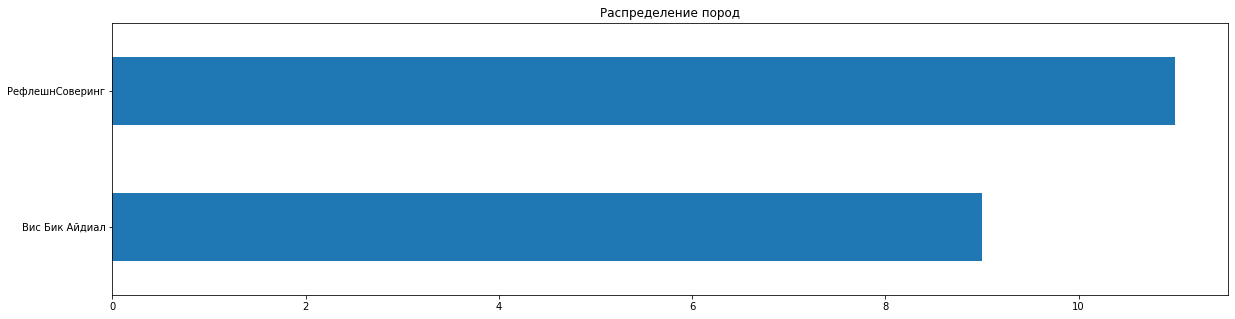

In [ ]:
cow['cow_breed'].value_counts().sort_values().plot.barh(figsize=(20, 5))
plt.title('Распределение пород')
plt.show()

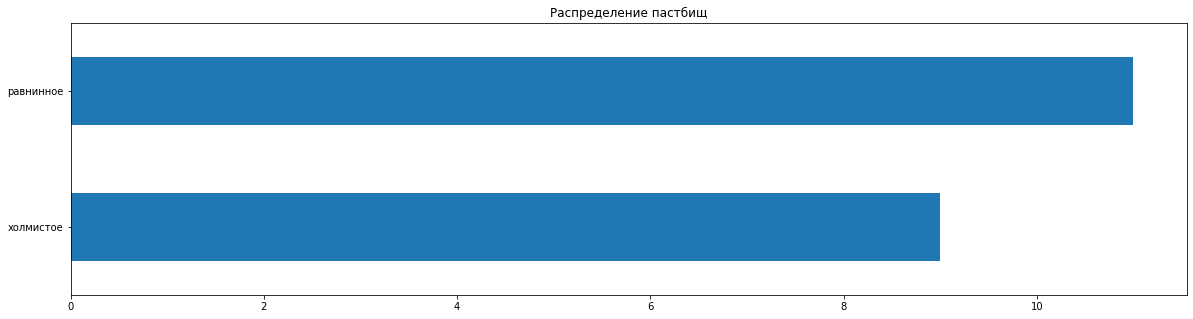

In [ ]:
cow['pasture_type'].value_counts().sort_values().plot.barh(figsize=(20, 5))
plt.title('Распределение пастбищ')
plt.show()

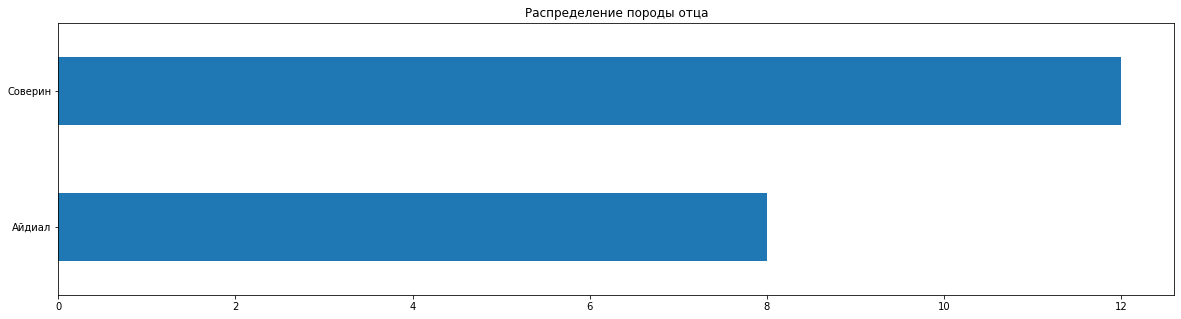

In [ ]:
cow['dad_breed'].value_counts().sort_values().plot.barh(figsize=(20, 5))
plt.title('Распределение породы отца')
plt.show()

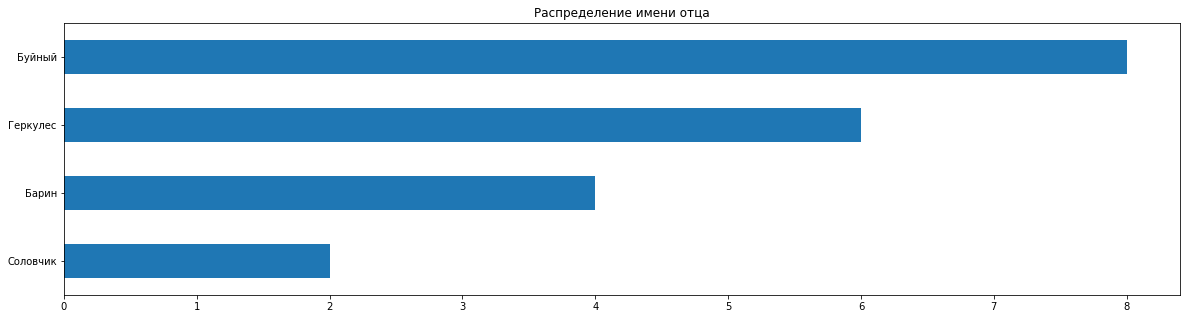

In [ ]:
cow['dad_name'].value_counts().sort_values().plot.barh(figsize=(20, 5))
plt.title('Распределение имени отца')
plt.show()

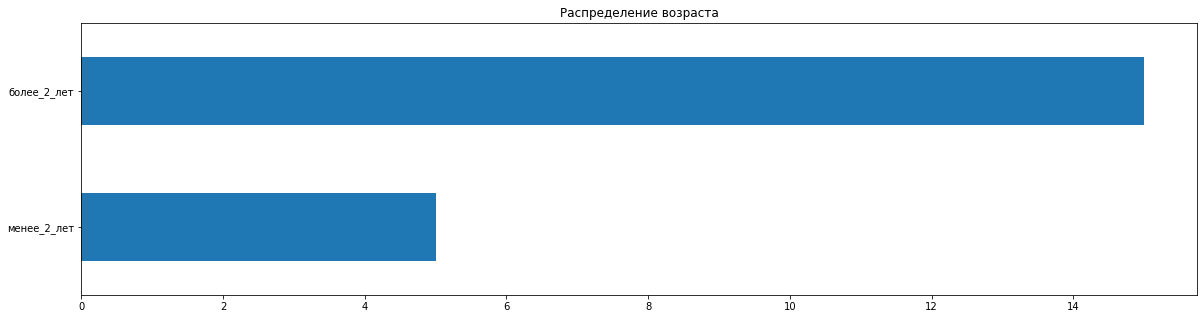

In [ ]:
cow['age'].value_counts().sort_values().plot.barh(figsize=(20, 5))
plt.title('Распределение возраста')
plt.show()

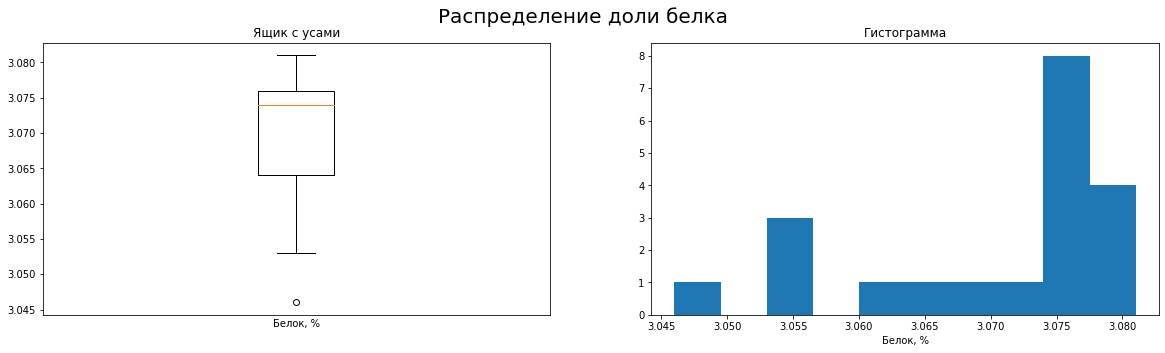

In [ ]:
plot_numeric(cow, 'protein_share', 'Распределение доли белка', 'Белок, %', 10)

Наблюдаем выброс, оставим как есть.

ВЫВОД:

- рассмотрели категориальные признаки и количесвенные переменные;
- избавились от выбросов.

## Корреляционный анализ

In [ ]:
main.head()

,id,milk_kg,eky,protein_g,spo,cow_breed,pasture_type,dad_breed,fat_share,protein_share,taste,age
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


In [ ]:
main[['milk_kg', 'protein_share']].corr('pearson')

,milk_kg,protein_share
milk_kg,1.000000,0.002288
protein_share,0.002288,1.000000


In [ ]:
main.drop(['protein_share', 'id'], axis=1).corr('spearman')

,milk_kg,eky,protein_g,spo,fat_share
milk_kg,1.000000,0.764683,0.437322,0.786345,0.687403
eky,0.764683,1.000000,0.383890,0.741703,0.686893
protein_g,0.437322,0.383890,1.000000,0.488510,0.395221
spo,0.786345,0.741703,0.488510,1.000000,0.699486
fat_share,0.687403,0.686893,0.395221,0.699486,1.000000


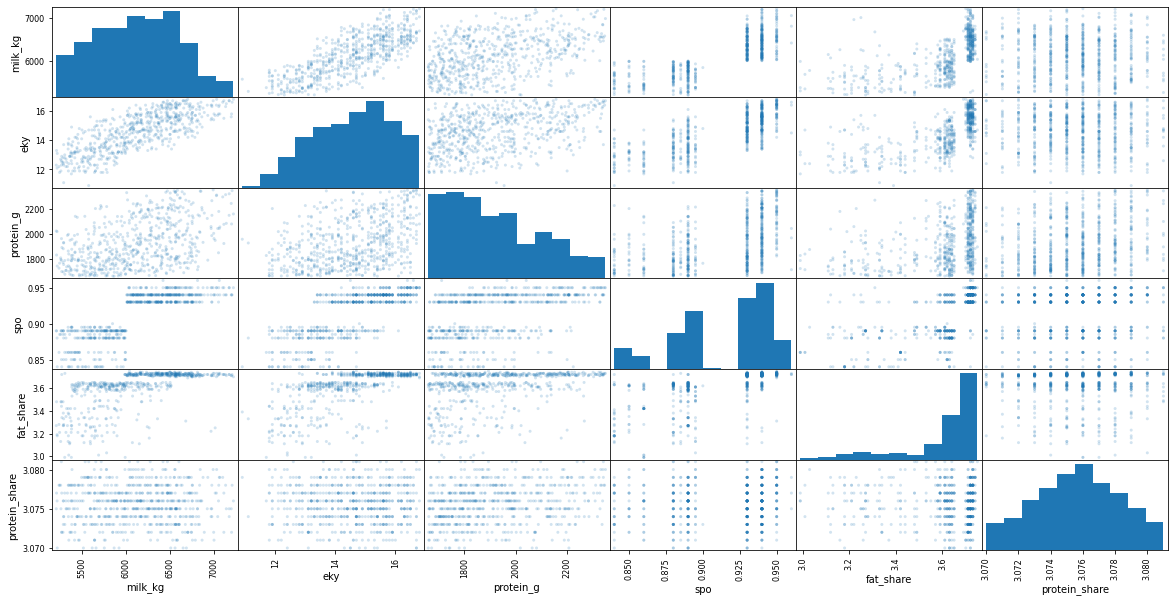

In [ ]:
pd.plotting.scatter_matrix(
    main.drop(['id'], axis=1), alpha=0.2, figsize=(20, 10)
)
plt.show()

Рассмотрим диаграммы рассеивания.
- Можем заметить положительную корреляцию между кормом ЭКЕ и удоем.
- Квадратичная зависимость наблюдается в двух случаях. В первом случае - между удоем и количеством граммов чистого протеина. Во втором - между кормом ЭКЕ и количеством граммов чистого протеина.
- Мультиколлинеарность не наблюдается. Так как, показателей свыше 0.9 при линейности не наблюдается.
- Связь между удоем и СПО - не линейная.

ВЫВОД:

Больше всего с целевой переменной коррелируют характеристики корма: ЭКЕ, количество граммов чистого протеина и СПО.

## Обучение модели линейной регрессии

Нужно избавиться от переменных, которые не могут повлиять на удой. Это в первую очередь характеристики молока. Характеристики корма, порода отца и тип пастбища уже могут повлиять на удой. Их оставим и закодируем.

In [ ]:
X = main.reset_index().drop(['milk_kg', 'index', 'id', 'taste', 'protein_share', 'fat_share'], axis=1)
y = main.reset_index().drop(['index'], axis=1)['milk_kg']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)

cat_col_names = ['cow_breed', 'dad_breed', 'pasture_type', 'age']

encoder = OneHotEncoder(drop='first')
cat_X_train = encoder.fit_transform(X_train[cat_col_names]).toarray()
cat_X_test = encoder.transform(X_test[cat_col_names]).toarray()

encoder.get_feature_names()

array(['x0_РефлешнСоверинг', 'x1_Соверин', 'x2_холмистое',
       'x3_менее_2_лет'], dtype=object)

In [ ]:
cat_cols = ['is_sovering_breed','is_sovering_dad','is_hill_pasture','is_younger_2_years']

In [ ]:
cat_X_train_df = pd.DataFrame(cat_X_train, columns=cat_cols)
cat_X_test_df = pd.DataFrame(cat_X_test, columns=cat_cols)

In [ ]:
X_train = X_train.reset_index().drop(['index'], axis=1)
X_train_for_learning = X_train.merge(cat_X_train_df, left_index=True, right_index=True)

X_test = X_test.reset_index().drop(['index'], axis=1)
X_test_for_learning = X_test.merge(cat_X_test_df, left_index=True, right_index=True)

display(X_train_for_learning.head())

,eky,protein_g,spo,cow_breed,pasture_type,dad_breed,age,is_sovering_breed,is_sovering_dad,is_hill_pasture,is_younger_2_years
0,16.6,1966,0.96,Вис Бик Айдиал,равнинное,Соверин,более_2_лет,0.0,1.0,0.0,0.0
1,16.4,1894,0.94,Вис Бик Айдиал,равнинное,Айдиал,более_2_лет,0.0,0.0,0.0,0.0
2,14.1,1977,0.89,Вис Бик Айдиал,равнинное,Айдиал,более_2_лет,0.0,0.0,0.0,0.0
3,13.4,1775,0.88,РефлешнСоверинг,равнинное,Айдиал,более_2_лет,1.0,0.0,0.0,0.0
4,14.7,1671,0.88,Вис Бик Айдиал,равнинное,Айдиал,более_2_лет,0.0,0.0,0.0,0.0


In [ ]:
X_train_for_learning = X_train_for_learning.drop(['cow_breed', 'dad_breed', 'pasture_type', 'age'], axis=1)
X_test_for_learning = X_test_for_learning.drop(['cow_breed', 'dad_breed', 'pasture_type', 'age'], axis=1)

display(X_train_for_learning.head())

,eky,protein_g,spo,is_sovering_breed,is_sovering_dad,is_hill_pasture,is_younger_2_years
0,16.6,1966,0.96,0.0,1.0,0.0,0.0
1,16.4,1894,0.94,0.0,0.0,0.0,0.0
2,14.1,1977,0.89,0.0,0.0,0.0,0.0
3,13.4,1775,0.88,1.0,0.0,0.0,0.0
4,14.7,1671,0.88,0.0,0.0,0.0,0.0


In [ ]:
num_cols = ['eky', 'protein_g', 'spo']

In [ ]:
scaler = StandardScaler()

X_train_for_learning_num = scaler.fit_transform(X_train_for_learning[num_cols])
X_train_for_learning_num = pd.DataFrame(X_train_for_learning_num, columns=num_cols, index=X_train_for_learning.index,)

X_test_for_learning_num = scaler.transform(X_test_for_learning[num_cols])
X_test_for_learning_num = pd.DataFrame(X_test_for_learning_num, columns=num_cols, index=X_test_for_learning.index)

X_train_for_learning = X_train_for_learning_num.merge(X_train_for_learning[cat_cols], how='left', left_index=True, right_index=True,)
X_test_for_learning = X_test_for_learning_num.merge(X_test_for_learning[cat_cols], how='left', left_index=True, right_index=True,)

In [ ]:
display(X_train_for_learning.head())
display(X_test_for_learning.head())

,eky,protein_g,spo,is_sovering_breed,is_sovering_dad,is_hill_pasture,is_younger_2_years
0,1.543027,0.206082,1.426018,0.0,1.0,0.0,0.0
1,1.388625,-0.185338,0.795084,0.0,0.0,0.0,0.0
2,-0.386997,0.265882,-0.782250,0.0,0.0,0.0,0.0
3,-0.927403,-0.832267,-1.097716,1.0,0.0,0.0,0.0
4,0.076209,-1.397651,-1.097716,0.0,0.0,0.0,0.0


,eky,protein_g,spo,is_sovering_breed,is_sovering_dad,is_hill_pasture,is_younger_2_years
0,-0.695800,0.091918,-0.782250,1.0,1.0,1.0,0.0
1,-2.085417,-1.446578,-2.359584,0.0,1.0,0.0,1.0
2,1.465826,0.836702,0.795084,0.0,0.0,1.0,0.0
3,-0.541398,-1.066031,-1.097716,0.0,1.0,1.0,0.0
4,0.925419,-1.158450,0.479618,0.0,1.0,1.0,0.0


In [ ]:
def model_test(X_train, y_train, X_test, y_test, model_lr):
    model_lr.fit(X_train, y_train)
    y_pred = model_lr.predict(X_test)

    r2 = r2_score(y_test, y_pred)

    print(f'R2: {r2}')

    plt.scatter(y_pred, y_test)
    plt.title('График остатков')
    plt.xlabel('Прогнозные значения модели')
    plt.ylabel('Реальные значения')
    plt.show()

    return model_lr

## Обучение и тест модели линейной регрессии

In [ ]:
model_lr = LinearRegression()

R2: 0.7832029531509055


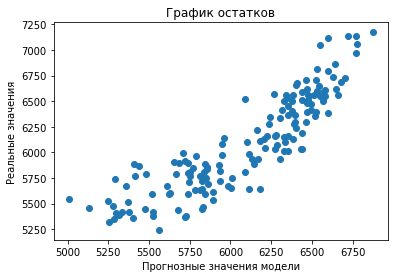

In [ ]:
model = model_test(
    X_train_for_learning,
    y_train,
    X_test_for_learning,
    y_test,
    model_lr
)

R2 ближе к единице, чем к минус бесконечности - это говорит и неплохом качестве модели. Остатки распределены неравномерно. Наблюдается линейная зависимость с убывающей дисперсией.

In [ ]:
main['is_high_spo'] = (main['spo'] > 0.91)*1
main.head()

,id,milk_kg,eky,protein_g,spo,cow_breed,pasture_type,dad_breed,fat_share,protein_share,taste,age,is_high_spo
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,0
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,0
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,0
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,0


In [ ]:
main['eky2'] = main['eky']**2
main.head()

,id,milk_kg,eky,protein_g,spo,cow_breed,pasture_type,dad_breed,fat_share,protein_share,taste,age,is_high_spo,eky2
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0,201.64
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,0,163.84
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,0,196.00
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,0,153.76
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,0,163.84


Разбивка на выборки, стандартизация количественных переменных и преобразование категориальных

In [ ]:
X = main.drop(['milk_kg', 'id', 'taste', 'protein_share', 'fat_share', 'eky', 'spo'],axis=1,)
y = main['milk_kg']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)

encoder = OneHotEncoder(drop='first')
cat_X_train = encoder.fit_transform(X_train[cat_col_names]).toarray()
cat_X_test = encoder.transform(X_test[cat_col_names]).toarray()

encoder.get_feature_names()

array(['x0_РефлешнСоверинг', 'x1_Соверин', 'x2_холмистое',
       'x3_менее_2_лет'], dtype=object)

In [ ]:
cat_cols = [
    'is_sovering_breed',
    'is_sovering_dad',
    'is_hill_pasture',
    'is_younger_2_years',
    'is_high_spo',
]

In [ ]:
cat_X_train_df = pd.DataFrame(cat_X_train, columns=['is_sovering_breed', 'is_sovering_dad','is_hill_pasture','is_younger_2_years'],)
cat_X_test_df = pd.DataFrame(cat_X_test, columns=['is_sovering_breed','is_sovering_dad','is_hill_pasture','is_younger_2_years'],)

In [ ]:
X_train = X_train.reset_index().drop(['index'], axis=1)
X_train_for_learning = X_train.merge(cat_X_train_df, left_index=True, right_index=True)

X_test = X_test.reset_index().drop(['index'], axis=1)
X_test_for_learning = X_test.merge(cat_X_test_df, left_index=True, right_index=True)

display(X_train_for_learning.head())

,protein_g,cow_breed,pasture_type,dad_breed,age,is_high_spo,eky2,is_sovering_breed,is_sovering_dad,is_hill_pasture,is_younger_2_years
0,1966,Вис Бик Айдиал,равнинное,Соверин,более_2_лет,1,275.56,0.0,1.0,0.0,0.0
1,1894,Вис Бик Айдиал,равнинное,Айдиал,более_2_лет,1,268.96,0.0,0.0,0.0,0.0
2,1977,Вис Бик Айдиал,равнинное,Айдиал,более_2_лет,0,198.81,0.0,0.0,0.0,0.0
3,1775,РефлешнСоверинг,равнинное,Айдиал,более_2_лет,0,179.56,1.0,0.0,0.0,0.0
4,1671,Вис Бик Айдиал,равнинное,Айдиал,более_2_лет,0,216.09,0.0,0.0,0.0,0.0


In [ ]:
num_cols = ['eky2', 'protein_g']

In [ ]:
scaler = StandardScaler()

X_train_for_learning_num = scaler.fit_transform(X_train_for_learning[num_cols])
X_train_for_learning_num = pd.DataFrame(X_train_for_learning_num, columns=num_cols, index=X_train_for_learning.index,)

X_test_for_learning_num = scaler.transform(X_test_for_learning[num_cols])
X_test_for_learning_num = pd.DataFrame(X_test_for_learning_num, columns=num_cols, index=X_test_for_learning.index)

X_train_for_learning = X_train_for_learning_num.merge(X_train_for_learning[cat_cols], how='left', left_index=True, right_index=True,)
X_test_for_learning = X_test_for_learning_num.merge(X_test_for_learning[cat_cols], how='left', left_index=True, right_index=True,)

display(X_train_for_learning.head())
display(X_test_for_learning.head())

,eky2,protein_g,is_sovering_breed,is_sovering_dad,is_hill_pasture,is_younger_2_years,is_high_spo
0,1.626057,0.206082,0.0,1.0,0.0,0.0,1
1,1.449208,-0.185338,0.0,0.0,0.0,0.0,1
2,-0.430475,0.265882,0.0,0.0,0.0,0.0,0
3,-0.946283,-0.832267,1.0,0.0,0.0,0.0,0
4,0.032546,-1.397651,0.0,0.0,0.0,0.0,0


,eky2,protein_g,is_sovering_breed,is_sovering_dad,is_hill_pasture,is_younger_2_years,is_high_spo
0,-0.728438,0.091918,1.0,1.0,1.0,0.0,0
1,-1.963160,-1.446578,0.0,1.0,0.0,1.0,0
2,1.537365,0.836702,0.0,0.0,1.0,0.0,1
3,-0.580528,-1.066031,0.0,1.0,1.0,0.0,0
4,0.931525,-1.158450,0.0,1.0,1.0,0.0,1


R2: 0.8347436421181886


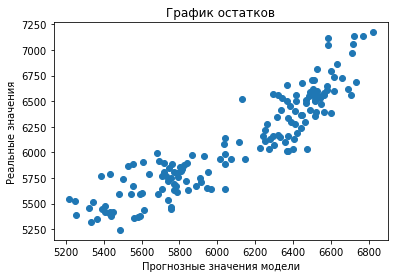

In [ ]:
model = model_test(
    X_train_for_learning, y_train, X_test_for_learning, y_test, model_lr
)

Наблюдаем увеличение показателя R2 до 0.83. Делаем вывод, что качество модели улучшилось.

In [ ]:
main = main.merge(dad)
main.head()

,id,milk_kg,eky,protein_g,spo,cow_breed,pasture_type,dad_breed,fat_share,protein_share,taste,age,is_high_spo,eky2,dad_name
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0,201.64,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,0,163.84,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,0,196.00,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,0,153.76,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,0,163.84,Барин


In [ ]:
X = main.drop(['milk_kg', 'id', 'taste', 'protein_share', 'fat_share', 'eky', 'spo'],axis=1,)
y = main['milk_kg']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)

cat_col_names = ['cow_breed', 'dad_breed', 'pasture_type', 'age', 'dad_name']

encoder = OneHotEncoder(drop='first')
cat_X_train = encoder.fit_transform(X_train[cat_col_names]).toarray()
cat_X_test = encoder.transform(X_test[cat_col_names]).toarray()

encoder.get_feature_names()

array(['x0_РефлешнСоверинг', 'x1_Соверин', 'x2_холмистое',
       'x3_менее_2_лет', 'x4_Буйный', 'x4_Геркулес', 'x4_Соловчик'],
      dtype=object)

In [ ]:
cat_X_train_df = pd.DataFrame(cat_X_train, columns=['is_sovering_breed','is_sovering_dad','is_hill_pasture','is_younger_2_years','is_furious','is_hercules','is_nightingale'])
cat_X_test_df = pd.DataFrame(cat_X_test, columns=['is_sovering_breed','is_sovering_dad','is_hill_pasture','is_younger_2_years','is_furious','is_hercules','is_nightingale'])

In [ ]:
X_train = X_train.reset_index().drop(['index'], axis=1)
X_train_for_learning = X_train.merge(cat_X_train_df, left_index=True, right_index=True)

X_test = X_test.reset_index().drop(['index'], axis=1)
X_test_for_learning = X_test.merge(cat_X_test_df, left_index=True, right_index=True)

display(X_train_for_learning.head())

,protein_g,cow_breed,pasture_type,dad_breed,age,is_high_spo,eky2,dad_name,is_sovering_breed,is_sovering_dad,is_hill_pasture,is_younger_2_years,is_furious,is_hercules,is_nightingale
0,1966,Вис Бик Айдиал,равнинное,Соверин,более_2_лет,1,275.56,Барин,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1894,Вис Бик Айдиал,равнинное,Айдиал,более_2_лет,1,268.96,Буйный,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1977,Вис Бик Айдиал,равнинное,Айдиал,более_2_лет,0,198.81,Буйный,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1775,РефлешнСоверинг,равнинное,Айдиал,более_2_лет,0,179.56,Геркулес,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1671,Вис Бик Айдиал,равнинное,Айдиал,более_2_лет,0,216.09,Буйный,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
num_cols = ['eky2', 'protein_g']
cat_cols = [
    'is_sovering_breed',
    'is_sovering_dad',
    'is_hill_pasture',
    'is_younger_2_years',
    'is_high_spo',
    'is_furious',
    'is_hercules',
    'is_nightingale',
]

In [ ]:
scaler = StandardScaler()

X_train_for_learning_num = scaler.fit_transform(X_train_for_learning[num_cols])
X_train_for_learning_num = pd.DataFrame(X_train_for_learning_num, columns=num_cols, index=X_train_for_learning.index,)

X_test_for_learning_num = scaler.transform(X_test_for_learning[num_cols])
X_test_for_learning_num = pd.DataFrame(X_test_for_learning_num, columns=num_cols, index=X_test_for_learning.index)

X_train_for_learning = X_train_for_learning_num.merge(X_train_for_learning[cat_cols], how='left', left_index=True, right_index=True,)
X_test_for_learning = X_test_for_learning_num.merge(X_test_for_learning[cat_cols], how='left', left_index=True, right_index=True,)

display(X_train_for_learning.head())
display(X_test_for_learning.head())

,eky2,protein_g,is_sovering_breed,is_sovering_dad,is_hill_pasture,is_younger_2_years,is_high_spo,is_furious,is_hercules,is_nightingale
0,1.626057,0.206082,0.0,1.0,0.0,0.0,1,0.0,0.0,0.0
1,1.449208,-0.185338,0.0,0.0,0.0,0.0,1,1.0,0.0,0.0
2,-0.430475,0.265882,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0
3,-0.946283,-0.832267,1.0,0.0,0.0,0.0,0,0.0,1.0,0.0
4,0.032546,-1.397651,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0


,eky2,protein_g,is_sovering_breed,is_sovering_dad,is_hill_pasture,is_younger_2_years,is_high_spo,is_furious,is_hercules,is_nightingale
0,-0.728438,0.091918,1.0,1.0,1.0,0.0,0,0.0,0.0,0.0
1,-1.963160,-1.446578,0.0,1.0,0.0,1.0,0,0.0,0.0,0.0
2,1.537365,0.836702,0.0,0.0,1.0,0.0,1,0.0,1.0,0.0
3,-0.580528,-1.066031,0.0,1.0,1.0,0.0,0,0.0,0.0,0.0
4,0.931525,-1.158450,0.0,1.0,1.0,0.0,1,0.0,0.0,0.0


R2: 0.8413986635664519


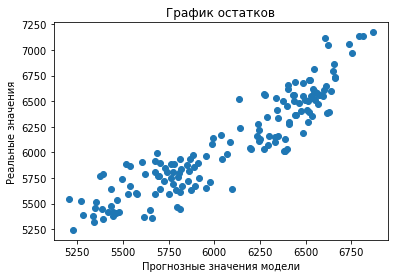

In [ ]:
model = model_test(
    X_train_for_learning, y_train, X_test_for_learning, y_test, model_lr
)

Мы смогли улучшить модель до 0.84.

In [ ]:
y_pred = model.predict(X_test_for_learning)
errors = y_test - y_pred
quantiles=(0.025, 0.975)

lower_quantile = np.quantile(errors, quantiles[0])
upper_quantile = np.quantile(errors, quantiles[1])

print(f"Доверительный интервал прогноза: [{lower_quantile}, {upper_quantile}]")

Доверительный интервал прогноза: [-360.6314300064206, 380.4421657475697]


In [ ]:
cow.head()

,cow_breed,pasture_type,dad_breed,dad_name,fat_share,protein_share,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [ ]:
cow['eky2'] = (main['eky'].mean() * 1.05) ** 2
cow['protein_g'] = main['protein_g'].mean() * 1.05
cow['is_high_spo'] = ((main['spo'].mean() * 1.05) > 0.92) * 1.0

cow.head()

,cow_breed,pasture_type,dad_breed,dad_name,fat_share,protein_share,age,eky2,protein_g,is_high_spo
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,233.378833,2019.77191,1.0
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,233.378833,2019.77191,1.0
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,233.378833,2019.77191,1.0
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,233.378833,2019.77191,1.0
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,233.378833,2019.77191,1.0


In [ ]:
cow_log = cow.copy()

In [ ]:
cow_cat = encoder.transform(cow[['cow_breed', 'dad_breed', 'pasture_type', 'age', 'dad_name']]).toarray()
encoder.get_feature_names()

array(['x0_РефлешнСоверинг', 'x1_Соверин', 'x2_холмистое',
       'x3_менее_2_лет', 'x4_Буйный', 'x4_Геркулес', 'x4_Соловчик'],
      dtype=object)

In [ ]:
cow_cat_df = pd.DataFrame(
    cow_cat,
    columns=[
        'is_sovering_bread',
        'is_sovering_dad',
        'is_hill_pasture',
        'is_younger_2_years',
        'is_furious',
        'is_hercules',
        'is_nightingale',
    ],
)

cow_cat_df.head()

,is_sovering_bread,is_sovering_dad,is_hill_pasture,is_younger_2_years,is_furious,is_hercules,is_nightingale
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
cow_num = scaler.transform(cow[['eky2', 'protein_g']])
cow.loc[:, ['eky2', 'protein_g']] = pd.DataFrame(cow_num, columns=['eky2', 'protein_g'])

cow.head()

,cow_breed,pasture_type,dad_breed,dad_name,fat_share,protein_share,age,eky2,protein_g,is_high_spo
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,0.495804,0.498407,1.0
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,0.495804,0.498407,1.0
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,0.495804,0.498407,1.0
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,0.495804,0.498407,1.0
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,0.495804,0.498407,1.0


In [ ]:
cow_final = cow.merge(cow_cat_df, left_index=True, right_index=True)

In [ ]:
cow_final = cow_final.drop(
    [
        'cow_breed',
        'pasture_type',
        'dad_breed',
        'dad_name',
        'fat_share',
        'protein_share',
        'age',
    ],
    axis=1,
)

cow_final.head()

,eky2,protein_g,is_high_spo,is_sovering_bread,is_sovering_dad,is_hill_pasture,is_younger_2_years,is_furious,is_hercules,is_nightingale
0,0.495804,0.498407,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.495804,0.498407,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,0.495804,0.498407,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.495804,0.498407,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.495804,0.498407,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
predict = model.predict(cow_final)

In [ ]:
cow_predict = cow.copy()

In [ ]:
cow_predict['milk_predict'] = predict

In [ ]:
cow_predict[cow_predict['milk_predict'] >= 6000]

,cow_breed,pasture_type,dad_breed,dad_name,fat_share,protein_share,age,eky2,protein_g,is_high_spo,milk_predict
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,0.495804,0.498407,1.0,6029.912394
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,0.495804,0.498407,1.0,6599.114441
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,0.495804,0.498407,1.0,6031.750387
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,0.495804,0.498407,1.0,6230.244865
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,0.495804,0.498407,1.0,6695.489245
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,0.495804,0.498407,1.0,6029.912394
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,0.495804,0.498407,1.0,6235.632982
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,0.495804,0.498407,1.0,6395.231846
11,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,0.495804,0.498407,1.0,6332.007786
12,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.68,3.046,более_2_лет,0.495804,0.498407,1.0,6029.912394


Нам удалось построить алгоритм обработки и подготовки данных для модели, обучить модель и получить прогнозы для удоев коров с фермы. В дальнейшем эту модель можно будет использовать и для покупки новых коров, обогащая её данными поступивших.

R2 = 84%

На вкус молока точно не будут влиять идентификаторы коров и удои. Остальные признаки в принципе могут повлиять на вкус.

In [ ]:
main['taste'] = (main['taste'] == 'вкусно') * 1.0

In [ ]:
X = main.drop(['id', 'milk_kg', 'eky', 'taste', 'spo'], axis=1)
y = main['taste']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)

In [ ]:
X_train.head()

,protein_g,cow_breed,pasture_type,dad_breed,fat_share,protein_share,age,is_high_spo,eky2,dad_name
188,1966,Вис Бик Айдиал,равнинное,Соверин,3.73,3.077,более_2_лет,1,275.56,Барин
208,1894,Вис Бик Айдиал,равнинное,Айдиал,3.72,3.074,более_2_лет,1,268.96,Буйный
137,1977,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.078,более_2_лет,0,198.81,Буйный
268,1775,РефлешнСоверинг,равнинное,Айдиал,3.63,3.071,более_2_лет,0,179.56,Геркулес
581,1671,Вис Бик Айдиал,равнинное,Айдиал,3.18,3.079,более_2_лет,0,216.09,Буйный


In [ ]:
num_cols = ['eky2', 'protein_g', 'fat_share', 'protein_share']
cat_cols = ['cow_breed', 'dad_breed', 'pasture_type', 'age', 'dad_name']

encoder = OneHotEncoder(drop='first')

cat_X_train = encoder.fit_transform(X_train[cat_cols]).toarray()
cat_X_test = encoder.transform(X_test[cat_cols]).toarray()
encoder.get_feature_names()

array(['x0_РефлешнСоверинг', 'x1_Соверин', 'x2_холмистое',
       'x3_менее_2_лет', 'x4_Буйный', 'x4_Геркулес', 'x4_Соловчик'],
      dtype=object)

In [ ]:
cat_X_train_df = pd.DataFrame(
    cat_X_train,
    columns=[
        'is_sovering_breed',
        'is_sovering_dad',
        'is_hill_pasture',
        'is_younger_2_years',
        'is_furious',
        'is_hercules',
        'is_nightingale',
    ],
)

cat_X_test_df = pd.DataFrame(
    cat_X_test,
    columns=[
        'is_sovering_breed',
        'is_sovering_dad',
        'is_hill_pasture',
        'is_younger_2_years',
        'is_furious',
        'is_hercules',
        'is_nightingale',
    ],
)

In [ ]:
X_train = X_train.reset_index().drop(['index'], axis=1)
X_train_for_learning = X_train.merge(cat_X_train_df, left_index=True, right_index=True)

X_test = X_test.reset_index().drop(['index'], axis=1)
X_test_for_learning = X_test.merge(cat_X_test_df, left_index=True, right_index=True)

display(X_train_for_learning.head())
display(X_test_for_learning.head())

,protein_g,cow_breed,pasture_type,dad_breed,fat_share,protein_share,age,is_high_spo,eky2,dad_name,is_sovering_breed,is_sovering_dad,is_hill_pasture,is_younger_2_years,is_furious,is_hercules,is_nightingale
0,1966,Вис Бик Айдиал,равнинное,Соверин,3.73,3.077,более_2_лет,1,275.56,Барин,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1894,Вис Бик Айдиал,равнинное,Айдиал,3.72,3.074,более_2_лет,1,268.96,Буйный,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1977,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.078,более_2_лет,0,198.81,Буйный,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1775,РефлешнСоверинг,равнинное,Айдиал,3.63,3.071,более_2_лет,0,179.56,Геркулес,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1671,Вис Бик Айдиал,равнинное,Айдиал,3.18,3.079,более_2_лет,0,216.09,Буйный,0.0,0.0,0.0,0.0,1.0,0.0,0.0


,protein_g,cow_breed,pasture_type,dad_breed,fat_share,protein_share,age,is_high_spo,eky2,dad_name,is_sovering_breed,is_sovering_dad,is_hill_pasture,is_younger_2_years,is_furious,is_hercules,is_nightingale
0,1945,РефлешнСоверинг,холмистое,Соверин,3.63,3.078,более_2_лет,0,187.69,Барин,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,1662,Вис Бик Айдиал,равнинное,Соверин,3.28,3.074,менее_2_лет,0,141.61,Барин,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,2082,Вис Бик Айдиал,холмистое,Айдиал,3.71,3.075,более_2_лет,1,272.25,Геркулес,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1732,Вис Бик Айдиал,холмистое,Соверин,3.64,3.073,более_2_лет,0,193.21,Барин,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,1715,Вис Бик Айдиал,холмистое,Соверин,3.73,3.078,более_2_лет,1,249.64,Барин,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
X_train_for_learning = X_train_for_learning.drop(['cow_breed', 'dad_breed', 'pasture_type', 'age', 'dad_name'], axis=1)
X_test_for_learning = X_test_for_learning.drop(['cow_breed', 'dad_breed', 'pasture_type', 'age', 'dad_name'], axis=1)

display(X_train_for_learning.head())
display(X_test_for_learning.head())

,protein_g,fat_share,protein_share,is_high_spo,eky2,is_sovering_breed,is_sovering_dad,is_hill_pasture,is_younger_2_years,is_furious,is_hercules,is_nightingale
0,1966,3.73,3.077,1,275.56,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1894,3.72,3.074,1,268.96,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1977,3.58,3.078,0,198.81,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1775,3.63,3.071,0,179.56,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1671,3.18,3.079,0,216.09,0.0,0.0,0.0,0.0,1.0,0.0,0.0


,protein_g,fat_share,protein_share,is_high_spo,eky2,is_sovering_breed,is_sovering_dad,is_hill_pasture,is_younger_2_years,is_furious,is_hercules,is_nightingale
0,1945,3.63,3.078,0,187.69,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,1662,3.28,3.074,0,141.61,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,2082,3.71,3.075,1,272.25,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1732,3.64,3.073,0,193.21,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,1715,3.73,3.078,1,249.64,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_for_learning_num = scaler.fit_transform(X_train_for_learning[num_cols])
X_train_for_learning_num = pd.DataFrame(X_train_for_learning_num, columns=num_cols)

X_test_for_learning_num = scaler.transform(X_test_for_learning[num_cols])
X_test_for_learning_num = pd.DataFrame(X_test_for_learning_num, columns=num_cols)

In [ ]:
X_train_for_learning[num_cols] = X_train_for_learning_num
X_test_for_learning[num_cols] = X_test_for_learning_num

display(X_train_for_learning.head())
display(X_test_for_learning.head())

,protein_g,fat_share,protein_share,is_high_spo,eky2,is_sovering_breed,is_sovering_dad,is_hill_pasture,is_younger_2_years,is_furious,is_hercules,is_nightingale
0,0.206082,0.727262,0.550740,1,1.626057,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.185338,0.665466,-0.656751,1,1.449208,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.265882,-0.199680,0.953236,0,-0.430475,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.832267,0.109301,-1.864241,0,-0.946283,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-1.397651,-2.671524,1.355733,0,0.032546,0.0,0.0,0.0,0.0,1.0,0.0,0.0


,protein_g,fat_share,protein_share,is_high_spo,eky2,is_sovering_breed,is_sovering_dad,is_hill_pasture,is_younger_2_years,is_furious,is_hercules,is_nightingale
0,0.091918,0.109301,0.953236,0,-0.728438,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,-1.446578,-2.053563,-0.656751,0,-1.963160,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.836702,0.603670,-0.254254,1,1.537365,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-1.066031,0.171097,-1.059247,0,-0.580528,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,-1.158450,0.727262,0.953236,1,0.931525,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
logistic_model = LogisticRegression(random_state=RANDOM_STATE)

In [ ]:
logistic_model.fit(X_train_for_learning, y_train)
y_pred = logistic_model.predict(X_test_for_learning)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(
    f'''Accuracy: {accuracy}
Precision: {precision}
Recall: {recall}'''
)

confusion_matrix(y_test, y_pred)

Accuracy: 0.6153846153846154
Precision: 0.6216216216216216
Recall: 0.7931034482758621


array([[27, 42],
       [18, 69]])

Accuracy показывает, что около 61.5% предсказаний модели соответствуют фактическим значениям, модель классифицирует объекты правильно примерно в 6 из 10 случаев.

Precision показывает, какой процент из объектов действительно являются положительными. В данном случае, из всех объектов, которые модель предсказала как положительные, около 62.2% действительно являются положительными. То есть, модель не очень хорошо избегает ложных срабатываний (false positives).

Recall показывает, какой процент положительных объектов был правильно предсказан моделью. В данном случае, около 79.3% всех положительных объектов были правильно идентифицированы моделью. Это означает, что модель хорошо находит большинство положительных объектов, но при этом может допускать ложные отрицательные (false negatives).

Критичнее всего при покупке коров ложно-положительная ошибка. Сейчас модель допускает ошибку первого рода в 42 случаях.

In [ ]:
y_proba = logistic_model.predict_proba(X_test_for_learning)

In [ ]:
data = pd.DataFrame(
    {'y_valid': y_test.to_numpy(), 'y_pred': y_pred, 'y_proba': y_proba[:, 1]}
)
data.head()

,y_valid,y_pred,y_proba
0,1.0,1.0,0.716267
1,0.0,0.0,0.287427
2,1.0,1.0,0.816418
3,0.0,1.0,0.675481
4,1.0,1.0,0.766379


In [ ]:
data[(data['y_valid'] == 0.0) & (data['y_pred'] == 1.0)]['y_proba'].max()

0.8087736431349019

In [ ]:
threshold = 0.8087736431349019

In [ ]:
y_pred_upgraded = (y_proba[:, 1] >= threshold) * 1

In [ ]:
precision_score(y_test, y_pred_upgraded)

0.9230769230769231

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(
    f'''Accuracy: {accuracy}
Precision: {precision}
Recall: {recall}'''
)

confusion_matrix(y_test, y_pred_upgraded)

Accuracy: 0.6153846153846154
Precision: 0.6216216216216216
Recall: 0.7931034482758621


array([[68,  1],
       [75, 12]])

Наблюдаем при пороге 0.808 нулевое значение критической ошибки 1-го рода FP. При минимальном значении критической ошибки 12 коров - количество истинно-положительного результата целевого признака вкуса молока.

In [ ]:
cow_log.head()

,cow_breed,pasture_type,dad_breed,dad_name,fat_share,protein_share,age,eky2,protein_g,is_high_spo
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,233.378833,2019.77191,1.0
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,233.378833,2019.77191,1.0
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,233.378833,2019.77191,1.0
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,233.378833,2019.77191,1.0
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,233.378833,2019.77191,1.0


In [ ]:
cow_cat = encoder.transform(cow_log[cat_cols]).toarray()

cow_cat_df = pd.DataFrame(
    cow_cat,
    columns=[
        'is_sovering_breed',
        'is_sovering_dad',
        'is_hill_pasture',
        'is_younger_2_years',
        'is_furious',
        'is_hercules',
        'is_nightingale',
    ],
)

cow_log = cow_log.reset_index().drop(['index'], axis=1)
cow_log = cow_log.merge(cow_cat_df, left_index=True, right_index=True)

cow_log = cow_log.drop(['cow_breed', 'dad_breed', 'pasture_type', 'age', 'dad_name'], axis=1)
cow_log.head()

,fat_share,protein_share,eky2,protein_g,is_high_spo,is_sovering_breed,is_sovering_dad,is_hill_pasture,is_younger_2_years,is_furious,is_hercules,is_nightingale
0,3.58,3.076,233.378833,2019.77191,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,3.54,3.081,233.378833,2019.77191,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,3.59,3.074,233.378833,2019.77191,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3.40,3.061,233.378833,2019.77191,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,3.64,3.074,233.378833,2019.77191,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
cow_num = scaler.transform(cow_log[num_cols])
cow_log[num_cols] = pd.DataFrame(cow_num, columns=num_cols)

cow_log.head()

,fat_share,protein_share,eky2,protein_g,is_high_spo,is_sovering_breed,is_sovering_dad,is_hill_pasture,is_younger_2_years,is_furious,is_hercules,is_nightingale
0,-0.199680,0.148243,0.495804,0.498407,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.446864,2.160727,0.495804,0.498407,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,-0.137883,-0.656751,0.495804,0.498407,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-1.312010,-5.889209,0.495804,0.498407,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.171097,-0.656751,0.495804,0.498407,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
y_proba = logistic_model.predict_proba(cow_log)

In [ ]:
y_proba

array([[0.18682737, 0.81317263],
       [0.24892534, 0.75107466],
       [0.28944046, 0.71055954],
       [0.29109773, 0.70890227],
       [0.28140617, 0.71859383],
       [0.48448663, 0.51551337],
       [0.18682737, 0.81317263],
       [0.23484762, 0.76515238],
       [0.28944046, 0.71055954],
       [0.23016707, 0.76983293],
       [0.30939877, 0.69060123],
       [0.32818458, 0.67181542],
       [0.28380414, 0.71619586],
       [0.19128178, 0.80871822],
       [0.28944046, 0.71055954],
       [0.27303503, 0.72696497],
       [0.20779817, 0.79220183],
       [0.44133295, 0.55866705],
       [0.33787985, 0.66212015],
       [0.28140617, 0.71859383]])

In [ ]:
cow_predict['is_tasty'] = y_proba[:, 1] > 0.809

In [ ]:
cow_predict[
    (cow_predict['is_tasty'] == True) & (cow_predict['milk_predict'] >= 6000)
]

,cow_breed,pasture_type,dad_breed,dad_name,fat_share,protein_share,age,eky2,protein_g,is_high_spo,milk_predict,is_tasty
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,0.495804,0.498407,1.0,6029.912394,True
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,0.495804,0.498407,1.0,6029.912394,True


## Итоговые выводы

На стадии предобработки:
- удалили дубликаты;
- привели тип пастбищ в датасетах main и cow к строчному написанию букв.

На стадии исследовательского анализа:
- рассмотрели и проанализировали категориальные признаки и количесвенные переменные;
- избавились от выбросов.

Затем провели корреляционный анализ. Больше всего с целевой переменной коррелируют характеристики корма: ЭКЕ, количество граммов чистого протеина и СПО.

Нам удалось построить алгоритм обработки и подготовки данных для модели, обучить модель и получить прогнозы для удоев коров с фермы. В дальнейшем эту модель можно будет использовать и для покупки новых коров, обогащая её данными поступивших.

Получили данные по целевому признаку Вкус молока. Объеденили полученняе данные и выявили перечень из 12 коров с удовлетворяющими для заказчика требованиями по удоям годовых более 6000 кг и со вкусным молоком.

Самое оптимальное значение порога — 0.808. При минимальном значении критической ошибки мы получаем 12 коров как количество истинно-положительного результата целевого признака вкуса молока.
Фермер, учитывая свои требования к объему удоев и качеству молока, может купить 12 коров из стада с минимальным риском для себя.

Качество модели.
Наибольшая проблема - огромное количество ложных отрицательных результатов(75). Модель плохо обнаруживает положительный класс.